# Assignment 3
JJordan

In [119]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [120]:
# constants
e = 1.602*10**-19 #C elementary charge

# Photoelectric Effect

Stopping Voltage
$$ V = \frac{h}{e}f - \phi $$

#### Load Data

In [121]:
# load data
photo_elec = np.loadtxt(r"C:\Users\jjord\OneDrive\Documents\Spring_2026\ItCP\photoelectric.csv", delimiter=',', skiprows=1)

In [122]:
# assign frequency and voltage data to arrays
f_exp = photo_elec[:, 0]
V_exp = photo_elec[:, 1]

#### Creating Optmized Model

In [123]:
# defining function for linear voltage model
def linear_voltage_model(f, m, c):
    return m*f + c

In [124]:
# find variables optimized to experimental data and covariance
popt, pcov = curve_fit(linear_voltage_model, f_exp, V_exp)

m_opt, c_opt = popt
opt_linear_V = linear_voltage_model(f_exp, m_opt, c_opt)

#### Solve for Constants

In [125]:
# calculating Planck's constant 
# m = h/e --> h = m*e
h = m_opt*e

# calculating work function
# V = m*f - p0 = m*f + c --> p0 = -c
p0 = -c_opt

print(f"Planck's constant is {h} J*s and work function is {p0} V")


Planck's constant is 6.351029983348348e-34 J*s and work function is 1.9867222801524018 V


#### Calculate Error

In [126]:
# calculating standard error
perr = np.sqrt(np.diag(pcov))
cerr = perr[1]
print(f'standard error of intercept is {cerr}')

standard error of intercept is 0.08445255813799026


#### Q 1.5, 1.6
Work function is estimated to be $1.99 \pm 0.08$ volts, based on experimental data.
Compared to tabulated work functions, this metal is likely Cesium.

#### Plot Experimental Data and Model

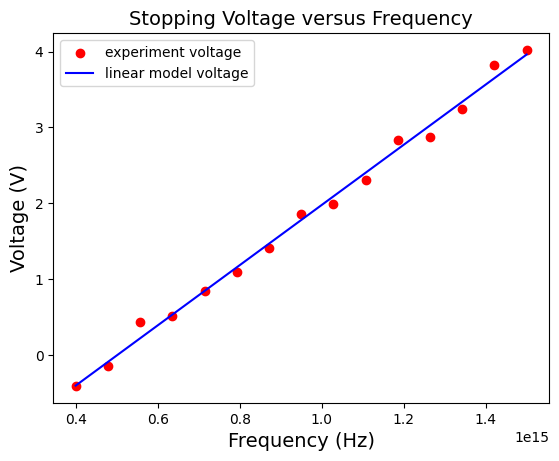

In [127]:
# plot experimental data and linear model
plt.scatter(f_exp, V_exp, color='red', label='experiment voltage')
plt.plot(f_exp, opt_linear_V, color='blue', label='linear model voltage')
plt.title('Stopping Voltage versus Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.legend()
plt.show()

# Radioactive Decay



$$ N(t) = N_{0}e^{-\lambda t} + b $$

#### Load Data

In [128]:
# load data
decay_data = np.loadtxt(r"C:\Users\jjord\OneDrive\Documents\Spring_2026\ItCP\decay_data.csv", delimiter=',', skiprows=1)

In [129]:
# assigning time and number of particles to variables
t_exp = decay_data[:,0]
N_exp = decay_data[:,1]

#### Guessing Optimized Parameters

In [130]:
# defining function for radioactive decay model
def radioact_decay_model(t, N0, lam, bg):
    return N0*np.exp(-lam*t) + bg

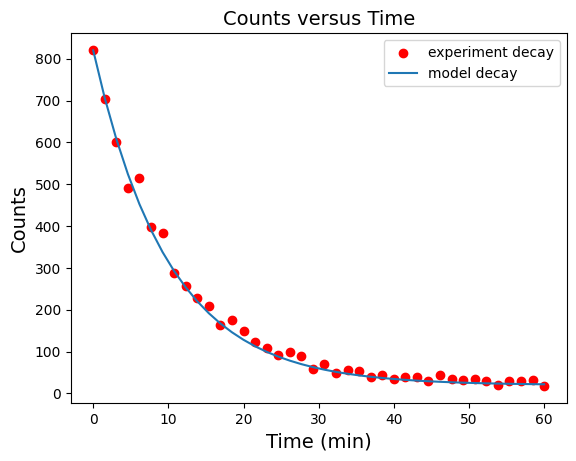

In [131]:
# plotting original function
plt.scatter(t_exp, N_exp, color='red', label='experiment decay')

# guessing optimal values 
decay_model_guess = radioact_decay_model(t_exp, 800, 0.1, 20)
plt.plot(t_exp, decay_model_guess, label='model decay')
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Counts versus Time', fontsize=14)
plt.legend()

#### Find Optimized Parameters

In [132]:
# finding the optimal values
popt, pcov = curve_fit(radioact_decay_model, t_exp, N_exp)

N_opt, lam_opt, bg_opt = popt

print('optimal parameters') 
print(f'initial count: {N_opt}')
print(f'constant of decay: {lam_opt} per minute')
print(f'background count: {bg_opt}')

optimal parameters
initial count: 788.9420128273666
constant of decay: 0.09522555847560166 per minute
background count: 23.474589231764977


C:\Users\jjord\AppData\Local\Temp\ipykernel_20592\2940111156.py:3: RuntimeWarning: overflow encountered in exp
  return N0*np.exp(-lam*t) + bg


In [133]:
# estimated half life, based on optimized model
#t_half = ln(2)/lambda
t_half = math.log(2)/lam_opt

print(f'half life is estimated to be {t_half} minutes')

half life is estimated to be 7.279003574839006 minutes


#### Linearizing Data

Text(0.5, 1.0, 'Log Counts versus Time')

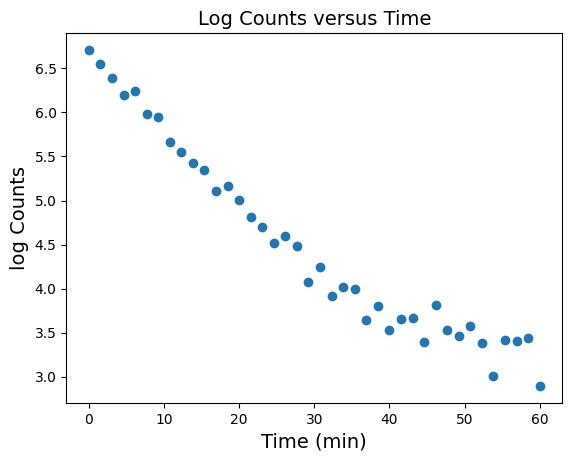

In [142]:
# plotting linearized experiment data 
log_counts = np.log(N_exp)

plt.scatter(t_exp, log_counts)
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('log Counts', fontsize=14)
plt.title('Log Counts versus Time', fontsize=14)

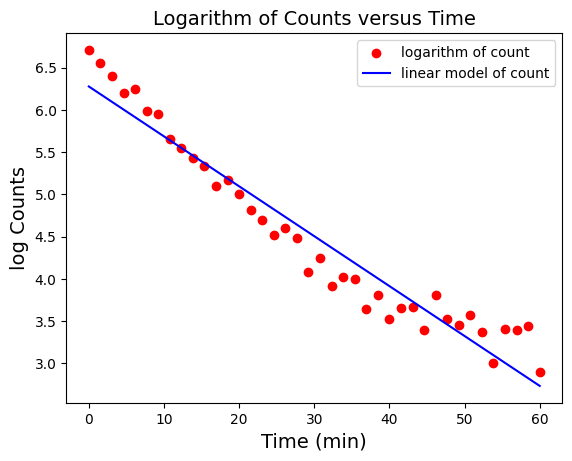

In [145]:
# plotting linear model for log radioactive decay
popt, pcov = curve_fit(linear_voltage_model, t_exp, log_counts)

slope_lam, incpt_N0 = popt

N_linear = linear_voltage_model(t_exp, slope_lam, incpt_N0)

plt.scatter(t_exp, log_counts, color='red', label='logarithm of count')
plt.plot(t_exp, N_linear, color='blue', label='linear model of count')
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('log Counts', fontsize=14)
plt.title('Logarithm of Counts versus Time', fontsize=14)
plt.legend()

#### Q 2.4

(I) At a glace, the non-linear plot appears to be a better fit, since it appeats to have less significant deviations from the data.
(II) The log plot, does not appear to be a straight line the whole time. As time increases, data points slightly bow and spread out. I believe this is because there is background radiation, so the data does not actually neatly simplify to a linear equation. It may be helpful to add additional terms to better approximate the experimental data.

## Residuals

Text(0, 0.5, 'Residuals')

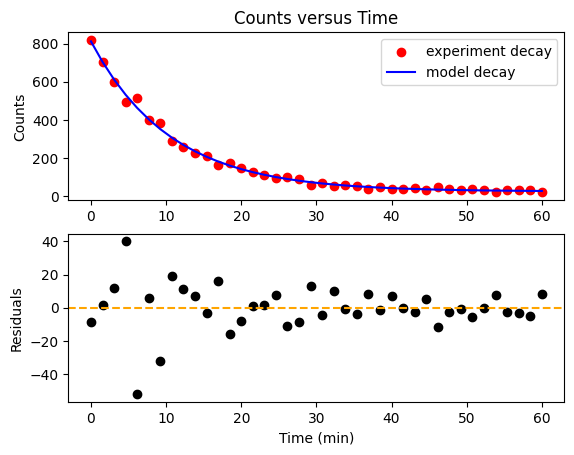

In [146]:
opt_decay_model = radioact_decay_model(t_exp, N_opt, lam_opt, bg_opt)
non_linear_residuals =  opt_decay_model - N_exp

# plot of experiment and model decay data
plt.subplot(211)
plt.scatter(t_exp, N_exp, color='red', label='experiment decay')
plt.plot(t_exp, opt_decay_model, color='blue', label='model decay')
plt.ylabel('Counts')
plt.title('Counts versus Time')
plt.legend()

# plot of residuals with horizontal line
plt.subplot(212)
plt.scatter(t_exp, non_linear_residuals, color='black')
plt.axhline(0, color='orange', linestyle='--')
plt.xlabel('Time (min)')
plt.ylabel('Residuals')

#### Q 3.3
The residuals do not appear to be completely random, since the values contract toward horizontal line as time progresses. This indicates the model equation may not be the best estimation.

## Polynomial Approximation

Taylor Series
$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)} (x)}{n!} (x - a)^n $$

#### Load Data

In [137]:
# load data
mystery_data = np.loadtxt(r"C:\Users\jjord\OneDrive\Documents\Spring_2026\ItCP\mystery_data.csv", delimiter=',', skiprows=1)

In [138]:
# assign data to variables
x_exp = mystery_data[:, 0]
y_exp = mystery_data[:, 1]

#### Creating Optimized Models

In [139]:
# defining polynomial models
def poly1(x, a, b):
    return a*x + b
    
def poly3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [140]:
# optimize poly1
popt, pcov = curve_fit(poly1, x_exp, y_exp)
a1_opt, b1_opt = popt

opt_poly1 = poly1(x_exp, a1_opt, b1_opt)

# optimize poly3
popt, pcov = curve_fit(poly3, x_exp, y_exp)
a2_opt, b2_opt, c2_opt, d2_opt = popt

opt_poly3 = poly3(x_exp, a2_opt, b2_opt, c2_opt, d2_opt)

#### Plotting Optimized Models and Mystery Data

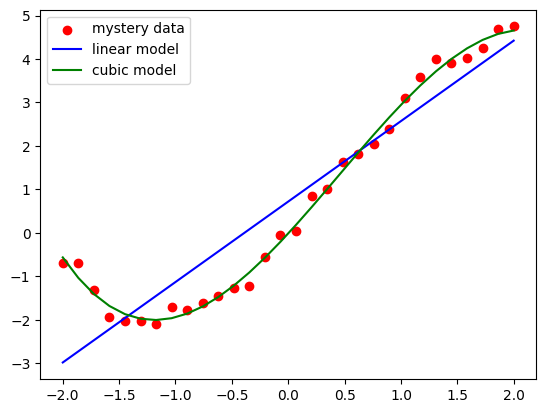

In [141]:
# plot mystery data and polynomial models

plt.scatter(x_exp, y_exp, color='red', label='mystery data')
plt.plot(x_exp, opt_poly1, color='blue', label='linear model')
plt.plot(x_exp, opt_poly3, color='green', label='cubic model')
plt.legend()

#### Q 4.4
At least five or six terms may be needed to follow the curves of mystery date, but infinitely many terms are probably needed for a perfect match.